<a href="https://colab.research.google.com/github/annaouyang/hello-world/blob/master/Copy_of_UNIV_3360_Clustering_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Homework

In this homework, you will be demonstrating your understanding of the unsupervised learning (clustering) methods that we went over in class. Refer to the lecture slides on Brightspace for explainations of the supervised learning algorithms and the in-class example notebooks for examples on how to use Python and Scikit-learn for supervised learning.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Iris Data

The first dataset that we will be analyzing is the Iris data. We have worked with this data before, but in case you have forgotten, the task is to classify different types of Iris flowers based on four physical measurements. For this assignment, we will be discarding the known labels and attempting to determine the type of flower by clustering on two of the features.

Run the cell below to load the data and format it into a dataframe.

In [144]:
iris_data = datasets.load_iris()

X_iris = iris_data.data
feature_names = iris_data.feature_names

data = pd.DataFrame(X_iris, columns=feature_names)
data = data[['petal length (cm)','sepal length (cm)']]
data.head()

,petal length (cm),sepal length (cm)
0,1.4,5.1
1,1.4,4.9
2,1.3,4.7
3,1.5,4.6
4,1.4,5.0


## K Means

First, we will cluster the Iris data using K-means.

### Known Number of Clusters

We know from prior knowledge that this dataset contains three type of iris flowers, and as a result, three classes. In the cell below, create and fit a KMeans clustering with K=3 for the iris data. Print the labels and the centroids that KMeans produces.

In [145]:
# create and fit KMeans clustering
k_means = KMeans(n_clusters=3)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [146]:
# print labels and centroids that KMeans produces
k_means_labels = k_means.labels_
print("Labels: ", k_means_labels)
print()

k_means_centroids = k_means.cluster_centers_
print("Centroids: \n", k_means_centroids)

Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]

Centroids: 
 [[1.49215686 5.00784314]
 [5.67804878 6.83902439]
 [4.39310345 5.87413793]]


Since we are only using two features, we are able to plot the data and visualize the classification. I have defined a function for you in the cell below which takes as input the data, the generated cluster labels (as you printed them above), and a few parameters for labeling the graph and plots the produced cluster in different colors.

**Important Note:** The input to the *plot_cluster* function must be a pandas dataframe, not a numpy array.

In [0]:
def plot_cluster(data, labels, plot_title):
  plt.figure(figsize=(10,5))
  unique_labels = set(labels)
  core_samples_mask = np.zeros_like(labels, dtype=bool)
  colors = ['b','g','r','c','m','y','k']

  for k in unique_labels:
      class_member_mask = (labels == k)
      xy = data[class_member_mask & ~core_samples_mask]
      plt.scatter(xy[xy.columns[0]], xy[xy.columns[1]], color=colors[k%7])

  plt.title(plot_title)
  plt.xlabel(data.columns[0])
  plt.ylabel(data.columns[1])
  plt.show()

In the cell below, use the *plot_clusters* function from above to plot the result of the KMeans algorithm.

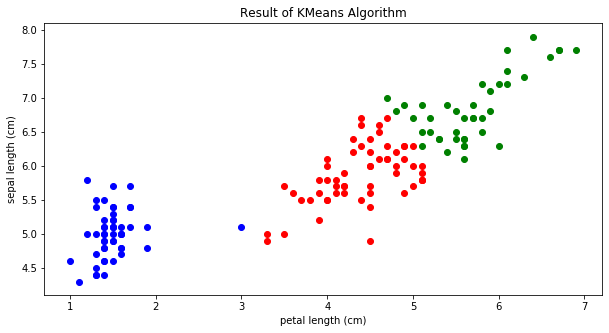

In [148]:
plot_cluster(data, k_means_labels, "Result of KMeans Algorithm")

**Question:** Brielfly dicuss the results of thr KMeans clustering including whether you believe the algorithm did a good job with the data for not.

[link text](https://)**Answer:** It looks like the algorithm did an OK job with the data. There is one green dot close to the rest of the blue cluster, but overall the algorithm was able to separate the smaller grouping on the left from the larger grouping on the right quite well. The iris dataset has 50 entries of each type of flower, and the clusters cardinalities were 58, 51, and 41 which aren't too far off.

In [149]:
count = [0, 0, 0]
for i in k_means_labels:
  if i == 0: 
    count[0] += 1
  elif i == 1: 
    count[1] += 1
  else: 
    count[2] += 1

print(count)

[51, 41, 58]


### Unkown Number of Clusters

Now we will evaluate the KMeans clustering without using our pior knowledge of the number of different Iris flowers.

**Question:** What types of metrics can we use to evaluate the performance of the KMeans algorithm in a trade-off curve?

**Answer:** When we don't know the number of clusters, we can evaluate the performance of the KMeans algorithm by looking at the trade-off between internia (sum of squared distances between each data point and the closest centroid) vs. k. Other "closeness" measures that can be used instead of interia include cosine similarity and correlation.

In the cell below, please fit KMeans for all values of K between 1 and 10 and plot the resulting trade-off curve.

In [0]:
# kMeans for all values of K between 1 and 10
k_values = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []

for k in k_values:
  k_means = KMeans(n_clusters=k)
  k_means.fit(data)
  inertia_values.append(k_means.inertia_)

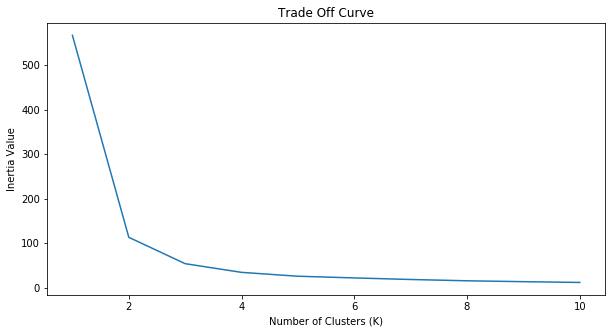

In [151]:
# plot of resulting trade-off curve
plt.figure(figsize=(10,5))
plt.plot(k_values, inertia_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia Value")
plt.title("Trade Off Curve")
plt.show()

**Question:** Based on the results of the trade-off curve, what value of K is optimal for the Iris data? Explain your reasoning.

**Answer:** The optimal value of K is 3, because that is where the elbow of the trade-off curve is. 

Based on your answer above, fit KMeans for the optimal value of K and plot the resulting clustering.

In [152]:
# KMeans for optimal value from above
k_means_optimal = KMeans(n_clusters=3)
k_means_optimal.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

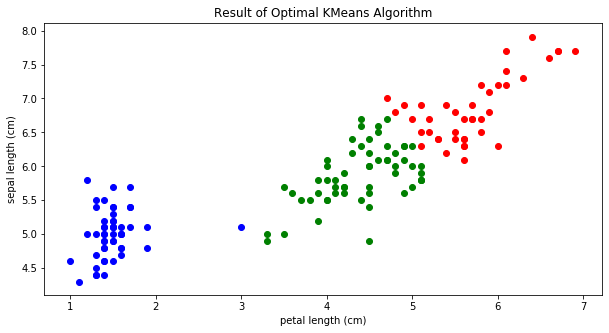

In [153]:
plot_cluster(data, k_means_optimal.labels_, "Result of Optimal KMeans Algorithm")

**Question:** How do the results of this clustering compare to the results of K=3 from earlier?

**Answer:** They are the same because k=3 in both cases.

## Agglomerative Hierarchical 

Now we will use a hierarchical clustering algorithm on the Iris data. Fit an average linkage agglomerative hierarchical clustering set to predict 3 clusters. Plot the results of the clustering.

In [154]:
# fit average linkage agglomerative hierachical clustering for 3 clusters
hier = AgglomerativeClustering(n_clusters=3, linkage='average')
hier.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

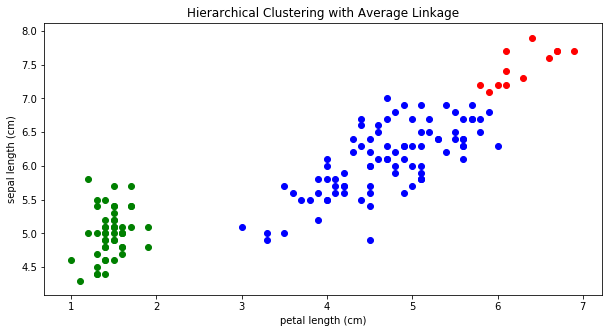

In [155]:
# results of clustering 
plot_cluster(data, hier.labels_, "Hierarchical Clustering with Average Linkage")

**Question:** Briefly decribe the results of the clustering. Is this a better or worse result than KMeans?

**Answer:** The hierarchical clustering method is able correctly classify all irises in the "green" cluster; it separates the smaller group on the left from the larger group on the right. Within the larger group on the right, it does not do a good job distinguishing between the 2 types of irises. It overpredicts the # of irises in the "blue" cluster. Overall, it is worse than KMeans.

Now fit an agglomerative hierarchical clustering with one other type of linkage of your choosing. Plot the results of the clustering.

In [156]:
# fit average linkage agglomerative hierachical clustering for 3 clusters
hier_single_linkage = AgglomerativeClustering(n_clusters=3, linkage='single')
hier_single_linkage.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)

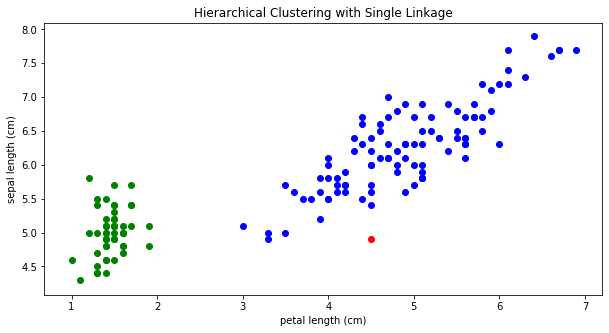

In [157]:
# results of clustering 
plot_cluster(data, hier_single_linkage.labels_, "Hierarchical Clustering with Single Linkage")

**Question:** Briefly describe the results of the clustering. How did it change from average linkage?

**Answer:** Compared to the average linkage, the single linkage does a poorer job with classifying the "red" and "blue" irises within the larger group on the right. It only classifies 1 data point as belonging to the "red" group, even though there should be 50. It classifies 99 data points as belonging to the "blue" group, even though there should be only 50.

**Question:** In general, how do you determine what type of linkage to use in hierarchical clustering?

**Answer:** In general, we want to increase INTRA-cluster similarity and decrease INTER-cluster similarity. Similarity can be measured by min. distance between two points in different clusters, max. distance between two points in different clusters, group average, and distance between centroids, just to name a few methods. 

Agglomerative hierarhical clustering minimizes these values when determining which of the smaller clusters should be merged together as the clusters are built up. To pick the appropriate linkage, you need to assess the strengths/limitations of these measurements in context with the data and what your particular goals are.



## DBSCAN

Now we will use a density based clustering algorithm on the Iris data. Fit a DBSCAN clustering using the default parameters and plot the results of the clustering.

In [158]:
# DBSCAN clustering with default param
db = DBSCAN()
db.fit(data)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

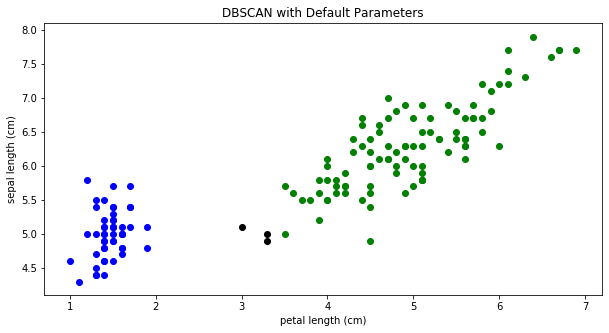

In [159]:
# plot results of clustering
plot_cluster(data, db.labels_, "DBSCAN with Default Parameters")

**Question:** Briefly describe the results of the clustering. Why did DBSCAN generate the clusters that it did? Is this a better or worse result than KMeans and Hierarchical clustering? What happens if you vary the value of eps?

**Answer:** DBSCAN creates clusters by grouping together points in high density regions. The black-colored points are noise points. It is a worse a result than both KMeans and Hiearchical clustering. When eps decreases, the number of noise points increases. No matter what, DBSCAN always creates 2 clusters because there are 2 high-density regions.

# Completely Unknown Data

Now we will test your understanding of these algorithms using a completely new and unknown dataset. We have generated a two feature dataset for you to analyze for the purposes of this assignment. The link for the data can be found in the cell below.

In preparation for your upcoming projects, this section is intentionally left much more open, as you will usually not have someone giving you step-by-step instructions on what to analyze and produce as we have for most of these homework assignments. 

Please analyze the provided data using any methods you think are sensibe and required. The use of clustering algorithms is required, but any other methods and analysis is at your discretion. During grading, we will run the code cells below in the order they appear (top to bottom). They should generate and display any relevant results. In addition, please include a text cell with a few paragraphs describing your findings. Here are some things that you should consider and answer in your analysis:

* How do K Means, Hierarchical, and DBSCAN compare? Which is best?
* Why are each of the clustering algorithms producing the results that they do?
* What happens if you vary the hyper-parameters (number of clusters and epsilon) of these algorithms?
* What is the optimal values for the hyper-parameters and how did you determine them?
* How many meaningful clusters are there in the data?
* Why is clustering a relevent way to analyze this data?
* Are there any other way in which this data could be analyzed?

In [0]:
data_path = "https://raw.githubusercontent.com/univ-3360-vu-smartcities/example-notebooks/master/datasets/unknown_data.csv"

In [0]:
# load in data from path into df 
df = pd.read_csv("https://raw.githubusercontent.com/univ-3360-vu-smartcities/example-notebooks/master/datasets/unknown_data.csv", names=['X','Y'])

# Exploratory Data Analysis

In [162]:
df.head()

,X,Y
0,-2.416023,1.563910
1,1.131589,-2.809383
2,-0.294090,-0.144495
3,0.763694,-2.539556
4,0.226626,-1.602913


In [163]:
df.describe()

,X,Y
count,600.000000,600.000000
mean,-2.280155,3.959474
std,3.402699,4.844348
min,-9.454916,-4.331011
25%,-3.627734,-0.076481
50%,-2.286169,2.225155
75%,0.539140,7.820491
max,4.237536,14.143218


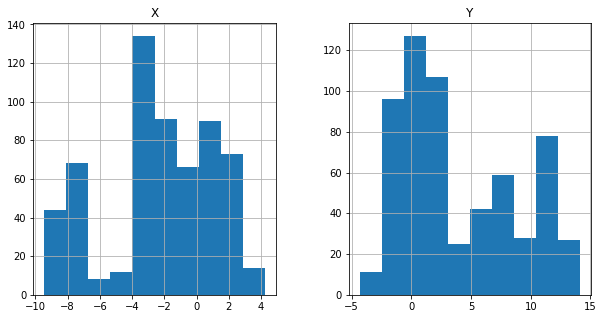

In [164]:
# histograms
df.hist(figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
plt.show()

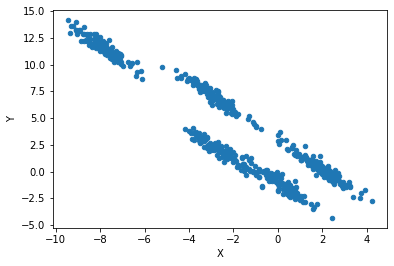

In [165]:
# scatter plot
df.plot(x='X', y='Y', kind='scatter')
plt.show()

**Why is clustering a relevant way to analyze this data?**

It looks the data form natural clusters from our scatterplot. Perhaps 3 or 4 clusters? 

# Data Analysis

#### KMeans Clustering

**How many meaningful clusters are there?**

Using the elbow method, we find that the optimal value of k is 3.

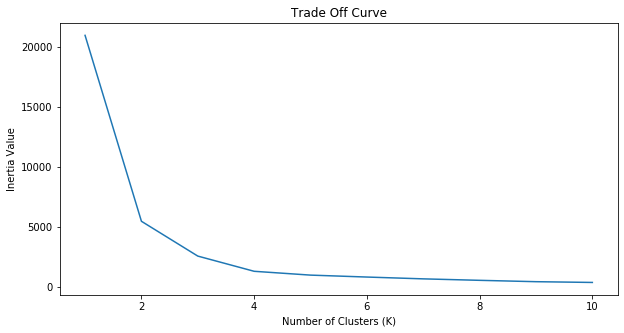

In [166]:
# kMeans for all values of K between 1 and 10
k_values = [1,2,3,4,5,6,7,8,9,10]
inertia_values = []

for k in k_values:
  k_means = KMeans(n_clusters=k)
  k_means.fit(df)
  inertia_values.append(k_means.inertia_)

# plot of resulting trade-off curve
plt.figure(figsize=(10,5))
plt.plot(k_values, inertia_values)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia Value")
plt.title("Trade Off Curve")
plt.show()

**Plot of KMeans Clustering**

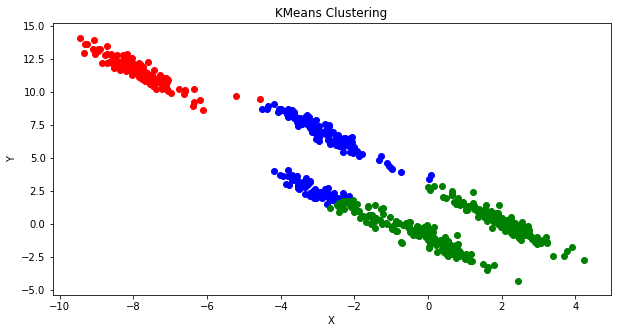

In [167]:
k_means = KMeans(n_clusters=3)
k_means.fit(df)
plot_cluster(df, k_means.labels_, "KMeans Clustering")

**Why did KMeans produce this result?**

KMeans produces spherical clusters because each point is assigned to the nearest centroid. 

#### Agglomerative Hierarchical Clustering

**Average Linkage**

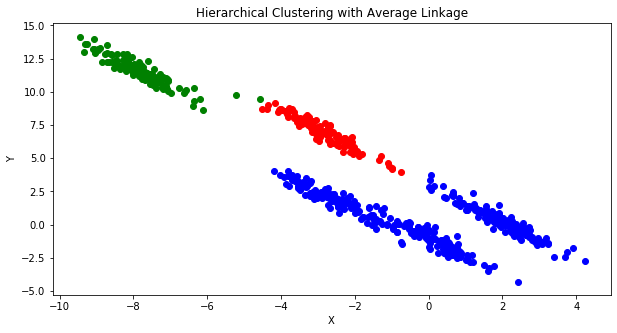

In [168]:
# fit average (avg dist) linkage agglomerative hierachical clustering for 3 clusters
hier_avg = AgglomerativeClustering(n_clusters=3, linkage='average')
hier_avg.fit(df)

# results of clustering 
plot_cluster(df, hier_avg.labels_, "Hierarchical Clustering with Average Linkage")

**Single Linkage**

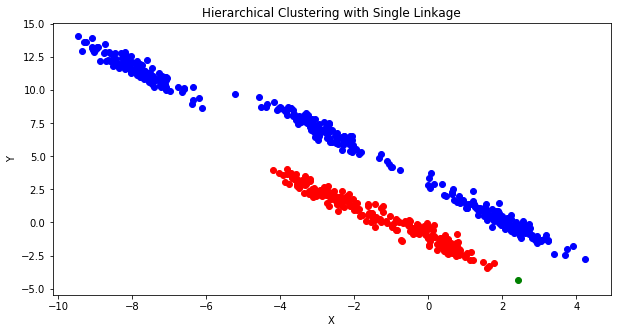

In [169]:
# fit single linkage (min dist) agglomerative hierachical clustering for 3 clusters
hier_single = AgglomerativeClustering(n_clusters=3, linkage='single')
hier_single.fit(df)

# results of clustering 
plot_cluster(df, hier_single.labels_, "Hierarchical Clustering with Single Linkage")

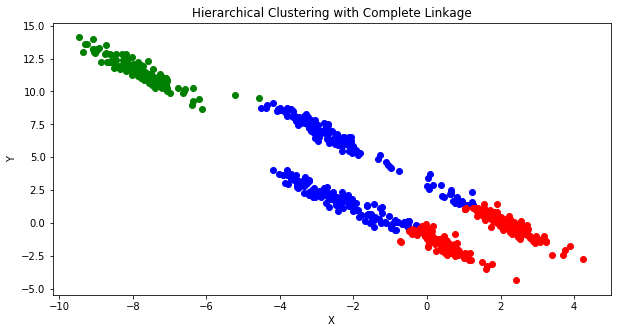

In [170]:
# fit complete (max dist) linkage agglomerative hierachical clustering for 3 clusters
hier_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
hier_complete.fit(df)

# results of clustering 
plot_cluster(df, hier_complete.labels_, "Hierarchical Clustering with Complete Linkage")

**Why did these hierarchical clusterings produce these results?**

 The first plot (average linkage) minimizes the average distance between observations in different groups. The second plot (single linkage) minimizes the minimum distance between observations in different groups. The third plot (complete linkage) minimizes the maximum distance between observations in different groups.

## DBSCAN

Default parameters

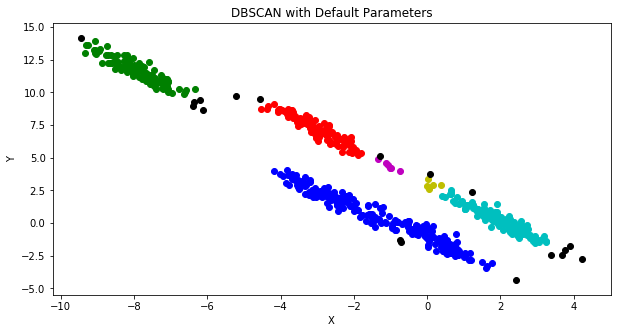

In [171]:
# DBSCAN clustering with default param
db = DBSCAN()
db.fit(df)
plot_cluster(df, db.labels_, "DBSCAN with Default Parameters")

Optimized parameters

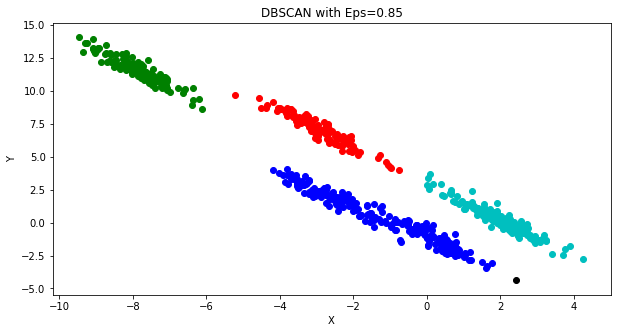

In [172]:
# altered eps and min points 
db_optimal = DBSCAN(eps=0.85)
db_optimal.fit(df)
plot_cluster(df, db_optimal.labels_, "DBSCAN with Eps=0.85")

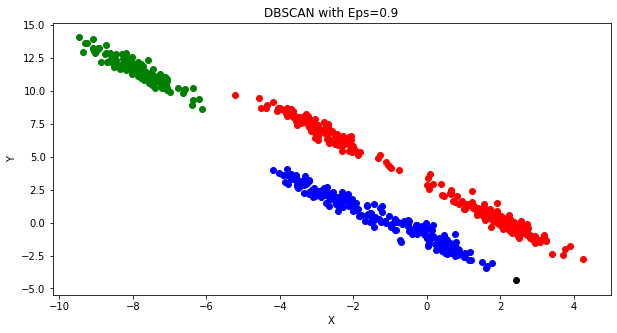

In [173]:
db_optimal = DBSCAN(eps=0.9)
db_optimal.fit(df)
plot_cluster(df, db_optimal.labels_, "DBSCAN with Eps=0.9")

**Why did DBSCAN create these plots?**

DBSCAN groups together observations based on density. Eps is a hyperparameter that refers to the max. distance between two observations for one to be considered in the neighborhood of another. While it is not a bound for the radius of each cluster from the center of the cluster, it does affect the area of the cluster. When eps increases, so does the potential area of the cluster. When eps increased from 0.85 to 0.9, we see that the group in the top-middle of the first graph got combined with the rest of the bottom-right group of the second graph.

**What are the optimal values for the hyper-parameters and how did you determine them?**

DBSCAN has 2 parameters: eps and min_samples. Since eps is more important, I adjusted it until the plot started showing results that were more fitting (colors corresponded to the clusters).

##### Other ways to analyze the data?

We have 2 quantitative variables so we could: 

1. Use a SVM to cluster into 2 groups.
2. Run a linear regression to predict Y from X.

# Reflection Questions

**Question:** Under what circumstances do each of the different types of clustering algorithms (partitional, hierarchical, density based) perform better than each other?

**Answer:**

KMeans (partitional) works best when clusters are roughly spherical and you have a prior understanding of how many clusters you are looking to find. 

Hierarchical works best when you don't know how many clusters there are. Also, it can reveal underlying taxonomies/relationships in the data (e.g., phylogenic trees in biology)

Density based works well when the data has a uniform density and is not highly dimensional. 

**Question:** What is the effect of the hyperparameters for each algorithm?

**Answer:**

K is the number of clusters in KMeans. 

The type of linkage in hierarchical clustering determines what similarity measure between clusters should be minimized. 

In DBSCAN, eps refers to the max. distance between two observations for one to be considered in the neighborhood of another. Min_sample refers to min. number of points that must be present in a neighborhood for an observation to be considered a core point.

**Question:** How do you determine what values of hyperparameters to use?

**Answer:**

For K in KMeans, you can use the elbow method with the intertia values for each K. In hierarchical clustering, it may depend on the context of the underlying data. Group averages are often used because they serve as a compromise between single and complete linkages. For a DBSCAN, you can toy with the values by hand and plot the corresponding results (like I did above), but you could also use the elbow method with the k-Nearest Neighbors (reflects density of data). 

**Question:** What are some ways that we can evaluate the performance of a clustering algorithm?

**Answer:** We can evaluate the intracluster (maximize this) and intercluster (minimize this) similarities using distance measures (e.g., Euclidean), correlation, and cosine similarty. 